
# Yellow Taxi Trip Records Data Analysis




## Objective of this Jupyter Notebook

This document analysis the ... 

**How is it structured ?**

- Broad overview 
- Data cleaning
- Data vizualisation




## Hands on


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

_Here we import pandas and numpy library, alongside the pyplot module from matplotlib library. At the end, we matplotlib plots directly in this interface.
np , pd , and plt are alias that refers to the libraries or module._

## Loading our data

In [21]:
file_path = 'C:/Users/deans/Desktop/LYNX_data_analysis/Yellow_Taxi_Assignment.csv/Yellow_Taxi_Assignment.csv'
yt = pd.read_csv(file_path)


_The code above creates a pandas DataFrame by reading the data from the Excel file specified by 'file_path'. Then we will have a glance about it structure._


## The data at a glance


_The following codes are uses to depicts a general framework of the data we have within the csv file._


In [23]:
yt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


_This is to get an idea about the categories of the information within the file. It also helps check the correspondance with the data library._

In [50]:
yt.shape

(304978, 21)

_the data holds 304.978 inputs (row) and 19 categories (column)._


In [25]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

In [26]:
yt.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,304978.000000,295465.000000,304978.000000,295465.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,232346.000000,106217.000000
mean,1.672786,1.479126,4.587589,1.142931,163.744975,160.988898,1.240463,13.510189,0.903506,0.492755,2.224064,0.390715,0.312725,19.050501,2.241650,0.085815
std,0.514069,1.108255,434.226624,2.969941,66.570490,70.975905,0.528257,12.636651,1.185321,0.074023,2.765200,1.699547,0.110404,15.464014,0.791877,0.318628
min,1.000000,0.000000,-16.860000,1.000000,1.000000,1.000000,0.000000,-197.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000
25%,1.000000,1.000000,1.000000,1.000000,121.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000
50%,2.000000,1.000000,1.730000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,0.000000
75%,2.000000,2.000000,3.210000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,0.000000
max,6.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,5.000000,455.000000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000


### _Summary of data at glance_

we 

## Data cleaning

A 4-step : 
- We wil start by seeking and finding missing data 
- correct missing data if exist
- seek error (such as difference between the data library preset categories and actual values)
- seek duplications

_numpy use NAN to identify a missing value

In [61]:
missing_valu = yt.isnull().sum()
display(missing_valu)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            9513
trip_distance                 0
RatecodeID                 9513
store_and_fwd_flag         9513
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      72632
airport_fee              198761
trip_duration                 0
trip_route                    0
dtype: int64

In [64]:
missing_value = yt[yt.isnull().any(axis=1)]
print('Seeking missing value')
#display(missing_value)

Seeking missing value


### Data cleaning summary and  insight

We 


## Creating new variables


For the purpose of our analysis we will create a set of new variables that :
- **trip_duration** which is a difference between the pick up time an dropoff time
- **trip_route** which the label A - B of a trip
- **trip_additional_charge** a difference between total amount charged and fare-amount



In [27]:
yt['tpep_dropoff_datetime'] = pd.to_datetime(yt['tpep_dropoff_datetime'])
yt['tpep_pickup_datetime'] = pd.to_datetime(yt['tpep_pickup_datetime'])
yt['trip_duration'] = yt['tpep_dropoff_datetime'] - yt['tpep_pickup_datetime']

_The codes above, first, change the data type of the dropoff and pickup variables from string to actual datetime object so that we could perform the the calculation of the trip duration_


In [53]:
yt['trip_route'] = yt.apply(lambda row: f"{row['PULocationID']}-{row['DOLocationID']}", axis=1)


In [62]:
yt['trip_additional_charge'] = yt['total_amount'] - yt['fare_amount']

## Numerical Analysis and Visualization

In [31]:
yt['VendorID'].value_counts()

2    201068
1    102886
6       521
4       500
5         3
Name: VendorID, dtype: int64

**_According to info within the library only 2 types of VendorID are registered. Whereas within the files there a 6, 4, 5 as well_** 

In [30]:
yt['store_and_fwd_flag'].value_counts()

N    292425
Y      3040
Name: store_and_fwd_flag, dtype: int64

In [47]:
yt['trip_route'].value_counts()

237-236    2069
264-264    1939
236-237    1673
236-236    1525
237-237    1422
           ... 
159-147       1
189-226       1
75-131        1
74-28         1
48-47         1
Name: trip_route, Length: 13913, dtype: int64

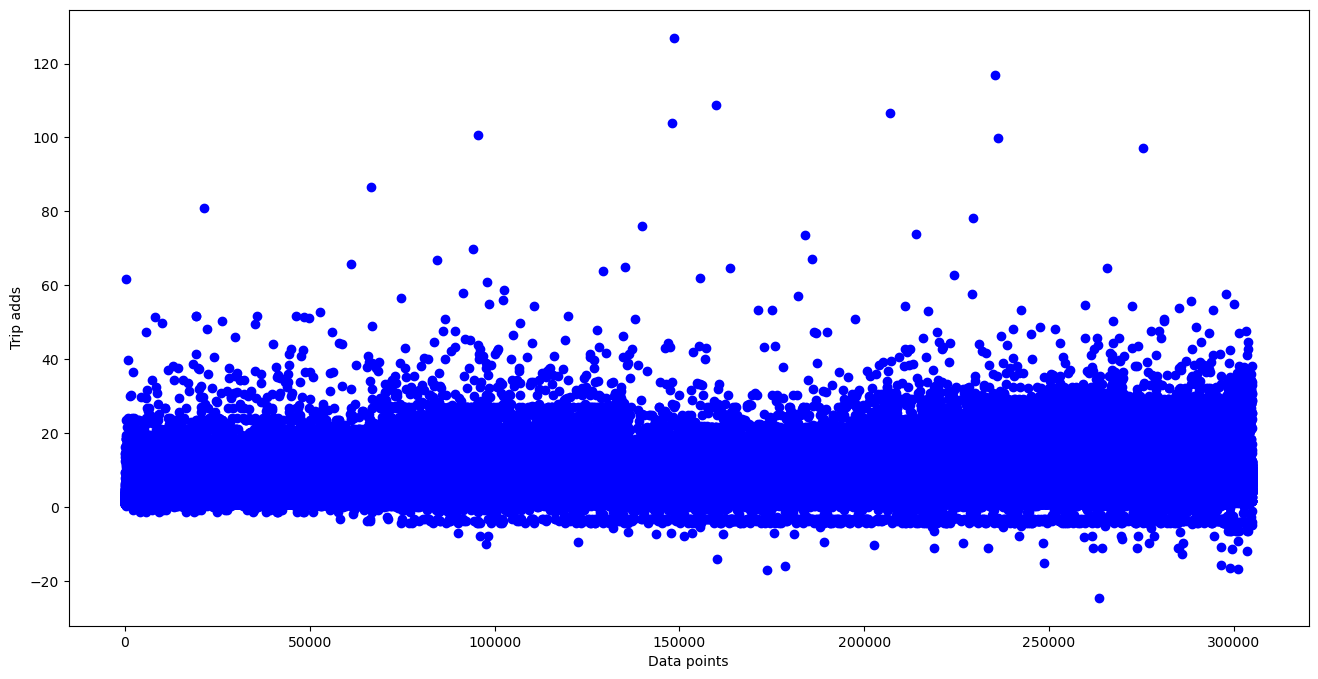

In [63]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(yt)), yt['trip_additional_charge'], color='blue')
plt.xlabel('Data points')
plt.ylabel('Trip adds')
plt.show()

In [29]:
yt['payment_type'].value_counts()

1    216662
2     75899
0      9513
3      1763
4      1140
5         1
Name: payment_type, dtype: int64

**_According to info within the library only 6 types of VendorID are registered. The number 0 here have no meaning_** 

In [28]:
yt['mta_tax'].value_counts()

 0.50    301643
 0.00      2196
-0.50      1122
 0.80         7
 2.54         3
 0.85         1
-0.07         1
 0.32         1
 0.55         1
 1.50         1
 1.60         1
 1.05         1
Name: mta_tax, dtype: int64

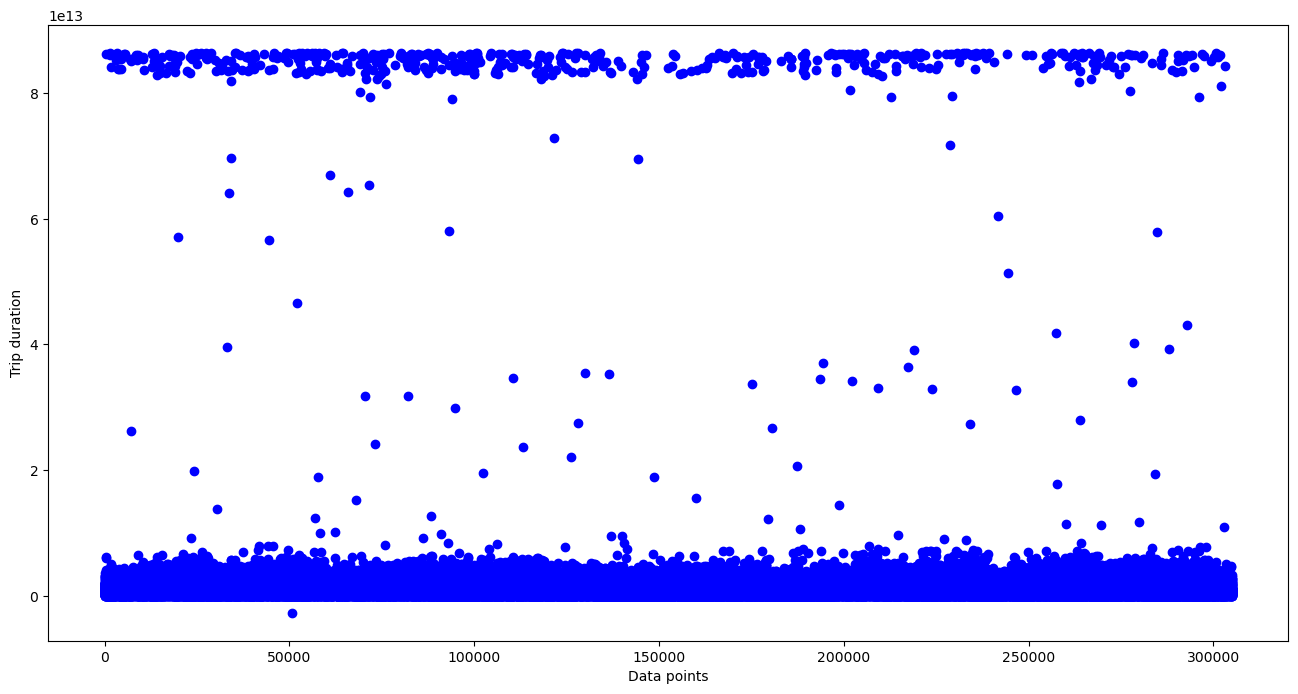

In [39]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(yt)), yt['trip_duration'], color='blue')
plt.xlabel('Data points')
plt.ylabel('Trip duration')
plt.show()

<Axes: ylabel='VendorID'>

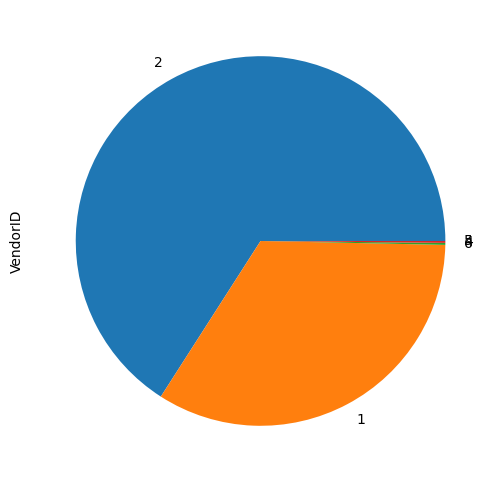

In [40]:
yt['VendorID'].value_counts().plot(kind='pie', figsize=(6,6)) 


## Categorical Analysis and visualization

## Relationship between column

## Column Wrangling

## Segmentation and indexing